Competition

https://www.kaggle.com/c/churn-prediction-the-bridge/data

In [124]:
# carga incial de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

import plotly.offline as plt
import plotly.graph_objs as go

import category_encoders as ce

from sklearn.naive_bayes import GaussianNB as NGB

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.simplefilter('ignore')


In [2]:
# carga de datos
data = pd.read_csv(r'C:\Users\ragod\OneDrive\Escritorio\Trabajo\Proyectos_TB\clasificacion\data\train.csv')
test = pd.read_csv(r'C:\Users\ragod\OneDrive\Escritorio\Trabajo\Proyectos_TB\clasificacion\data\test.csv')

# Analisis y limpieza de train


In [3]:
# vista de variables
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,id
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,1,0
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,0,1
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,0,2
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,0,3
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,1,4


<AxesSubplot:xlabel='Churn', ylabel='Count'>

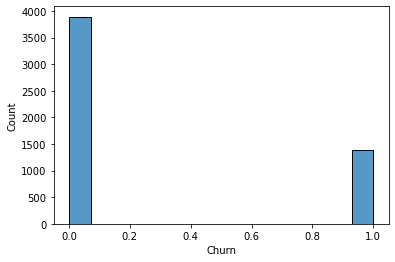

In [4]:
sns.histplot(data= data['Churn'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [6]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [7]:
df_num =data.select_dtypes(include=np.number)

In [8]:
df_num

,SeniorCitizen,tenure,MonthlyCharges,Churn,id
0,0,1,25.30,1,0
1,0,7,75.15,0,1
2,0,4,20.05,0,2
3,0,29,76.00,0,3
4,0,3,75.10,1,4
...,...,...,...,...,...
5277,0,1,95.00,1,5277
5278,0,23,91.10,0,5278
5279,0,12,21.15,0,5279
5280,1,12,99.45,1,5280


Analisis de la columna TotalCharges.- Deberia der numerica.

In [9]:
data['TotalCharges2']=pd.to_numeric(data['TotalCharges'], errors ='coerce')

In [10]:
data[data['TotalCharges2'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,id,TotalCharges2
2067,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,2067,NaN
2382,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,2382,NaN
2551,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,2551,NaN
3622,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,3622,NaN
4671,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,4671,NaN
4678,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,4678,NaN
4991,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,4991,NaN
5247,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,5247,NaN


In [11]:
# Se cambia valor de TotalCharges a 0 ya que todos tienen menos de un año permanencia

data['TotalCharges2'].fillna(0.00 ,inplace =True)
data[data['tenure']==0]['TotalCharges2'].replace([data[data['tenure']==0]['TotalCharges2']],[data[data['tenure']==0]['MonthlyCharges']])
data[data['tenure']==0]['TotalCharges2']

2067    0.0
2382    0.0
2551    0.0
3622    0.0
4671    0.0
4678    0.0
4991    0.0
5247    0.0
Name: TotalCharges2, dtype: float64

Analisis de columnas numericas

In [12]:
#Comprobacion duplicados
len(data)==len(data.drop_duplicates())
df2 =data.drop_duplicates()  # elimina los duplicados(filas), tienen que ser exactamente iguales
len(df2),len (data)

(5282, 5282)

In [13]:
#seleccion de numericas para ver: constantes y baja varianza
cte_cols=[]

for c in data.select_dtypes(include=np.number):  # para cada columna en las numericas...
    
    if data[c].std()==0:
        cte_cols.append(c)
        
low_var=[]

for c in data.select_dtypes(include=np.number):  # para cada columna en las numericas...

    minimo=data[c].min()                # minimo de la columna
    per_90=np.percentile(data[c], 90)   # percentil 90, donde residen el 90% de los datos
    
    if per_90==minimo:
        low_var.append(c)
        
        
cte_cols, low_var


([], [])

In [14]:
#busqueda de outliers

stats=data.describe().T

stats['IQR']=stats['75%'] - stats['25%']

outliers=pd.DataFrame(columns=data.columns)

for e in stats.index:
    
    iqr=stats.at[e, 'IQR']
    
    cutoff=1.5*iqr
    
    lower=stats.at[e, '25%']-cutoff
    upper=stats.at[e, '75%']+cutoff
    
    results=data[(data[e]<lower) | (data[e]>upper)].copy()
    
    results['outliers']=e
    
    outliers=outliers.append(results, sort=True)
    
outliers['outliers'].value_counts()

SeniorCitizen    844
Name: outliers, dtype: int64

In [15]:
#Comprobacion que los outliers son los de valor 1
data[data['SeniorCitizen']==1].count()

customerID          844
gender              844
SeniorCitizen       844
Partner             844
Dependents          844
tenure              844
PhoneService        844
MultipleLines       844
InternetService     844
OnlineSecurity      844
OnlineBackup        844
DeviceProtection    844
TechSupport         844
StreamingTV         844
StreamingMovies     844
Contract            844
PaperlessBilling    844
PaymentMethod       844
MonthlyCharges      844
TotalCharges        844
Churn               844
id                  844
TotalCharges2       844
dtype: int64

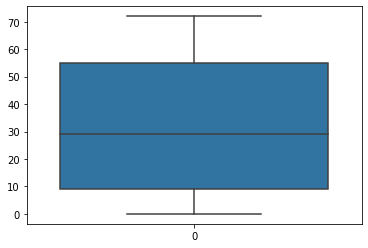

In [16]:
# Variable tenure
df=data

sns.boxplot(data = df.tenure);

In [17]:
# colineales
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,Churn,id,TotalCharges2
SeniorCitizen,1.000000,0.006169,0.219945,0.146549,-0.000523,0.093905
tenure,0.006169,1.000000,0.253618,-0.345513,0.013142,0.827561
MonthlyCharges,0.219945,0.253618,1.000000,0.186615,-0.016420,0.654350
Churn,0.146549,-0.345513,0.186615,1.000000,-0.011426,-0.193972
id,-0.000523,0.013142,-0.016420,-0.011426,1.000000,0.004379
TotalCharges2,0.093905,0.827561,0.654350,-0.193972,0.004379,1.000000


In [18]:
colineales=[]

for c in data._get_numeric_data():  # recorre las columnas del df
    
    for i in range(len(data.corr())): # recorre las filas de la matriz de correlacion
        
        if abs(data.corr()[c][i])>0.9 and abs(data.corr()[c][i])<1:
            
            colineales.append(c)  # añado la columna que voy a borrar

colineales=list(set(colineales))
colineales

[]

In [19]:
data[data['TotalCharges2']==0]



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,id,TotalCharges2
2067,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,2067,0.0
2382,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,2382,0.0
2551,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,2551,0.0
3622,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,3622,0.0
4671,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,4671,0.0
4678,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,4678,0.0
4991,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,4991,0.0
5247,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,5247,0.0


Analisis de columnas categoricas

In [20]:
# valores unicos
object_cols=[]


object_cols =[c for c in data.select_dtypes(include=object)]  # para cada columna object...
    
object_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [21]:
# tabulacion de valores en numeros
object_cols2 =[
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']
dictionary = {}
for c in object_cols2:
    dictionary.update({c:data[c].unique() })
   


In [22]:
pd.DataFrame([dictionary])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,"[Male, Female]","[No, Yes]","[Yes, No]","[No, Yes]","[No phone service, No, Yes]","[DSL, Fiber optic, No]","[No, No internet service, Yes]","[No, No internet service, Yes]","[No, Yes, No internet service]","[No, No internet service, Yes]","[No, No internet service, Yes]","[No, No internet service, Yes]","[Month-to-month, One year, Two year]","[Yes, No]","[Electronic check, Bank transfer (automatic), ..."


In [23]:
# Comprobacion que los valores no internet service conincide con no internet

internet_services = [
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']
bad_index=[]

df_IS = data[data['InternetService']== 'No']

for c in df_IS.index:
    for x in internet_services:
        if df_IS[x].loc[c]!='No internet service':
            bad_index.append(df_IS.index)


In [24]:
bad_index

[]

In [25]:
#Cambio de valor de las variables categoricas:
# las dependientes de Servicos de internet solo valores No y No Internet Service = 0, Si =1
#Gender: Male:0 Female:1
#Partner: No:0 Yes:1
#Dependents: NO:0 yes:1
#PhoneService: No:0 Yes:1
#paperlessBilling: No:0 Yes:1
# Se aplica get_dummy a MultipleLines,Internetservice, Contract y PaymentMethod 
codificacion = [{'col':'gender','mapping':{'Male':0, 'Female':1}},
                {'col' :'Partner', 'mapping':{'No':0, 'Yes':1}},
                {'col' :'Dependents', 'mapping':{'No':0, 'Yes':1}},
                {'col':'PhoneService','mapping':{'No':0, 'Yes':1}},
                {'col':'PaperlessBilling','mapping':{'No':0, 'Yes':1}},
                {'col':'OnlineSecurity','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'OnlineBackup','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'TechSupport','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'StreamingTV','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'DeviceProtection','mapping':{'No':0, 'No internet service':0, 'Yes':1}},
                {'col':'StreamingMovies','mapping':{'No':0, 'No internet service':0, 'Yes':1}} ]


In [26]:
#Aplicamos la transformación  a las variables catgeoricas
encoder = ce.OrdinalEncoder(cols = ['gender',
                                    'Partner',
                                    'Dependents',
                                    'PhoneService',
                                    'PaperlessBilling',
                                    'OnlineSecurity',
                                     'OnlineBackup',
                                     'DeviceProtection',
                                     'TechSupport',
                                     'StreamingTV',
                                     'StreamingMovies'], mapping= codificacion)

df_encoded =encoder.fit_transform(data)


In [27]:
df_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,id,TotalCharges2
0,7242-QZLXF,0,0,0,1,1,0,No phone service,DSL,0,...,0,0,Month-to-month,1,Electronic check,25.30,25.3,1,0,25.30
1,8325-QRPZR,1,0,0,0,7,1,No,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,75.15,525,0,1,525.00
2,7874-ECPQJ,1,0,0,1,4,1,No,No,0,...,0,0,Month-to-month,1,Bank transfer (automatic),20.05,85.5,0,2,85.50
3,2476-YGEFM,1,0,0,0,29,1,Yes,Fiber optic,0,...,0,0,Month-to-month,1,Credit card (automatic),76.00,2215.25,0,3,2215.25
4,2276-YDAVZ,1,0,0,0,3,1,Yes,Fiber optic,0,...,0,0,Month-to-month,1,Credit card (automatic),75.10,270.7,1,4,270.70


In [28]:
# Aplicamos la obtencion de dummies


# Definimos qué columnas serán dummificadas y cómo deben ser interpretadas
# Cada clave del diccionario equivale a un nombre de columna
# `prefix` es el prefijo que se añadirá a cada columna dummy
# `sep` especifica el caracter separador de los elementos de la celda
dummy_columns = {
    'Contract': {
        'prefix': 'Cont_',
        'sep': ';'
    },
   'MultipleLines':{
        'prefix': 'Mlines_',
        'sep': ';'
    },
    'InternetService':{
        'prefix': 'IS_',
        'sep': ';'
    },     
    'PaymentMethod':{
        'prefix': 'PayM_',
        'sep': ';'
    } 
    # Aquí podemos añadir todas las columnas que queramos
}

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df_encoded[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df_encoded2 = pd.concat([df_encoded, dummies], axis=1)

# [Opcional] Eliminamos las columnas originales de df
df_encoded2 = df_encoded2.drop(columns=dummy_columns.keys())

# Ahora df.head() mostrará las columnas dummy
df_encoded2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,id,TotalCharges2,PayM__Bank transfer (automatic),PayM__Credit card (automatic),PayM__Electronic check,PayM__Mailed check
0,7242-QZLXF,0,0,0,1,1,0,0,0,0,...,1,25.30,25.3,1,0,25.30,0,0,1,0
1,8325-QRPZR,1,0,0,0,7,1,0,0,1,...,1,75.15,525,0,1,525.00,0,0,1,0
2,7874-ECPQJ,1,0,0,1,4,1,0,0,0,...,1,20.05,85.5,0,2,85.50,1,0,0,0
3,2476-YGEFM,1,0,0,0,29,1,0,0,0,...,1,76.00,2215.25,0,3,2215.25,0,1,0,0
4,2276-YDAVZ,1,0,0,0,3,1,0,0,0,...,1,75.10,270.7,1,4,270.70,0,1,0,0


In [29]:
# Eliminamos columnas que no aportan
df_encoded3 = df_encoded2.drop(['customerID','TotalCharges','Churn','id'], axis = 1)

In [102]:
#separacion de datos
from sklearn.model_selection import train_test_split as tts
y = df_encoded2.Churn  # objetivo

X = df_encoded3._get_numeric_data()  # datos
#Normalizacion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler



X_train, X_temp, y_train, y_temp = tts(X, y,  test_size=2640) 

X_meta, X_test, y_meta, y_test = tts(X_temp, y_temp,  test_size=1320)



In [103]:
X.shape, X_train.shape

((5282, 19), (2642, 19))

In [126]:
from xgboost import XGBClassifier as XGBC
xgbc=XGBC(use_label_encoder=False, n_estimators=10)

from sklearn.neighbors import KNeighborsClassifier as KNNC
knnc=KNNC(n_neighbors=13)

from lightgbm import LGBMClassifier as LGBMC
lgbmc=LGBMC()

from sklearn.linear_model import LogisticRegression as LR
lr =LR()

from sklearn.tree import DecisionTreeClassifier as DTC
dtc=DTC()

from sklearn.naive_bayes import GaussianNB as NGB
ngb =NGB()

In [127]:
n_df=pd.DataFrame()

# predicciones de los modelos

n_df['xgbc']=xgbc.fit(X_train, y_train).predict(X_meta)
n_df['lgbmc']=lgbmc.fit(X_train, y_train).predict(X_meta)
n_df['lr']=lr.fit(X_train, y_train).predict(X_meta)
n_df['knnc']=knnc.fit(X_train, y_train).predict(X_meta)
n_df['dtc']=dtc.fit(X_train, y_train).predict(X_meta)
n_df['ngb']=ngb.fit(X_train, y_train).predict(X_meta)

#mas

n_df.head()

[01:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,xgbc,lgbmc,lr,knnc,dtc,ngb
0,1,1,1,1,0,1
1,1,1,1,1,1,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,1,1


In [128]:
from sklearn.linear_model import LinearRegression as LinReg

In [129]:
lr2=LR()

lr2.fit(n_df.values, y_meta)   # datos del df de predicciones y el target original (!!!!!dimensiones)

LogisticRegression()

In [133]:
# Fase de testeo, solo predict

n_df['xgbc']=xgbc.predict(X_test)
n_df['lgbmc']=lgbmc.predict(X_test)
n_df['lr']=lr.predict(X_test)
n_df['knnc']=knnc.predict(X_test)
n_df['dtc']=dtc.predict(X_test)
n_df['ngb']=ngb.predict(X_test)

In [134]:
#prediccion final

lr2.predict(n_df.values)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [135]:
lr2.score(n_df.values, y_test)

0.7909090909090909

In [136]:
y_pred=lr2.predict(n_df.values)

from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average ='macro')

0.700941698735208

In [122]:
#Aplicamos transformaciones al df de test
test['TotalCharges2']=pd.to_numeric(test['TotalCharges'], errors ='coerce')
test['TotalCharges2'].fillna(0.00 ,inplace =True)
encoder = ce.OrdinalEncoder(cols = ['gender',
                                    'Partner',
                                    'Dependents',
                                    'PhoneService',
                                    'PaperlessBilling',
                                    'OnlineSecurity',
                                     'OnlineBackup',
                                     'DeviceProtection',
                                     'TechSupport',
                                     'StreamingTV',
                                     'StreamingMovies'], mapping= codificacion)

df_encoded_t =encoder.fit_transform(test)

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df_encoded_t[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df_encoded2t = pd.concat([df_encoded_t, dummies], axis=1)

# [Opcional] Eliminamos las columnas originales de df
df_encoded2t = df_encoded2t.drop(columns=dummy_columns.keys())

# Ahora df.head() mostrará las columnas dummy
df_encoded2t.head()

df_encoded3 = df_encoded2t.drop(['customerID','TotalCharges','id'], axis = 1)

df_encoded3 =stan.fit_transform(df_encoded3)



In [123]:
# Calcualmos prediccion
y_pred= modelo.predict(df_encoded3)

NameError: name 'modelo' is not defined

In [41]:
y_pred= pd.DataFrame(y_pred)
y_pred.columns=['Churn']

#id_column = df
y_pred.insert(1,'id',test['id'], True)

In [43]:
#y_pred.to_csv(r'C:\Users\ragod\OneDrive\Escritorio\Trabajo\Proyectos_TB\clasificacion\ramon_Stackcsv', index= False, sep=',')